<a href="https://colab.research.google.com/github/SedyaPrograms/Tutorial/blob/main/AI%20and%20machine%20learning/1.%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Хотим сделать линейную регрессию методом наименьших квадратов и град спуска

In [5]:
import numpy as np
import numpy.linalg 
import sklearn
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

тут поигрался с шумом (noice)
наша цель: провести линию через точки

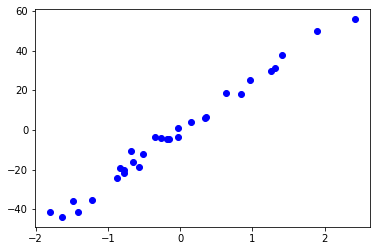

In [6]:
X, y = make_regression(n_samples=30, n_features=1, noise=3) # делает кастомный дата-сет
plt.plot(X, y, 'bo')

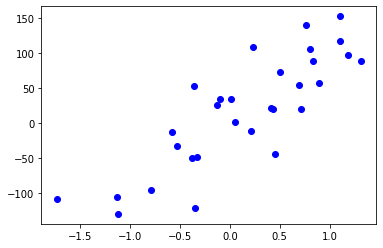

In [35]:
X, y = make_regression(n_samples=30, n_features=1, noise=40)
plt.plot(X, y, 'bo')

попробуем в лоб посчитать (сделаем так называемое аналитическое решение)

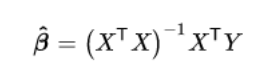

формула псевдообратной матрицы в помощь, по ней считаем наклон нашей прямой

In [37]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([89.11275318])

получили параметр, который как-то описывает нашу прямую
построим на графике эту пряму (вспоминаем уравнение прямой)

[89.11275318]


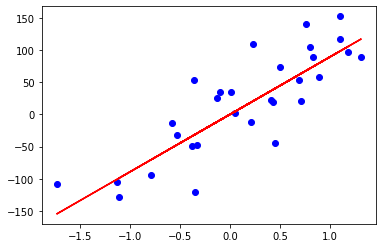

In [36]:
#X, y = make_regression(n_samples=30, n_features=1, noise=40)
plt.plot(X, y, 'bo')
B = np.linalg.inv(X.T @ X) @ X.T @ y
print(B)
plt.plot(X, 0 + B * X, "r")

тут константу наклона обозначил B, чтоб формуле соответсвовать, далее аналогичная ей констаната, будет называться иначе

Ну вот так как-то, вроде похоже, теперь пропробуем сделать то же самое, но инструментами sklearn 

In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() #делаем экземпрляр класса Линейная регрессия
linreg. fit(X, y) #fit - обучить модель; predick - предсказать , ес инглиш мен

LinearRegression()

In [11]:
linreg.coef_

array([98.73485715])

Получили коэфициент оч похожий, на полученный в лоб
Для того чтобы найти начальную точку испльзуем linreg.intercept_ 
(уравнение прямой y = a*x + b, a - linreg.coef_, b - linreg.intercept_ )

In [12]:
linreg.intercept_ 

0.9683356603534721

Идем дальше, смотрим такой пример

In [14]:
X = np.linspace(-10, 10, 30)
y = X ** 3

РИсуем

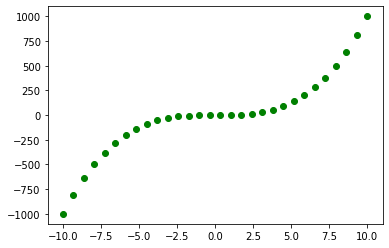

In [15]:
plt.plot(X, y, 'go')

Используем для нее нашу Лин. регресию и глядим на параметры

In [16]:
X.shape

(30,)

[64.04280618] 4.5464596547827e-14


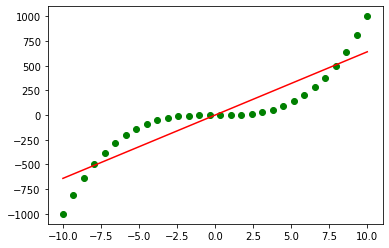

In [17]:
linreg = LinearRegression()
linreg.fit(X.reshape(-1, 1), y)
A = linreg.coef_
B = linreg.intercept_ 
print(A, B)
plt.plot(X, y, 'go')
plt.plot(X, B + A * X, "r")

У нас синусоида, как нам линейной функцией апроксимировать ее?
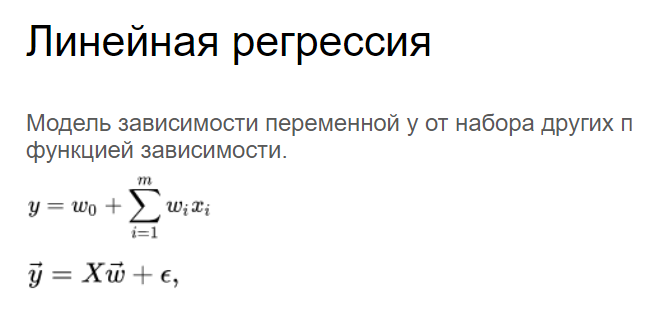

Надо указать разные веса перед каждым слагаемым, тогда их наклон будет разный ( тут опять смотрим уравнение прямой, ну и физ смысл производной)

Это будем называть фичами, представим их в виде полиномов

In [18]:
X = X.reshape(-1,1)
X.shape

(30, 1)

In [19]:
X_new = np.hstack((X , X ** 2)) 

A =  [6.40428062e+01 9.78541445e-16] B =  -5.0076506466791146e-14


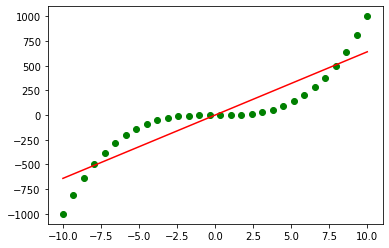

In [20]:
linreg = LinearRegression()
linreg.fit(X_new, y)
A = linreg.coef_ # тут теперь 2 значения, потому, что это квадрат. Уравнение кривой теперь использавть будем
B = linreg.intercept_ 
print("A = ",A,"B = ", B)
plt.plot(X, y, 'go')
plt.plot(X, B + A[0] * X + A[1] * X ** 2, "r")

Получили, что коэфициент перед квадратом оч маленький почти ноль, поэтому остается прямая

ИДЕМ ДАЛЬШЕ И ДЕЛАЕМ КУБ

In [21]:
X_new = np.hstack((X , X ** 2, X ** 3)) 
X_new.shape

(30, 3)

A =  [ 1.58248309e-14 -1.33226763e-15  1.00000000e+00] B =  4.747160519086872e-14


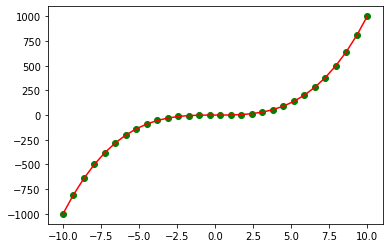

In [22]:
linreg = LinearRegression()
linreg.fit(X_new, y)
A = linreg.coef_ # тут теперь 3 значения
B = linreg.intercept_ 
print("A = ",A,"B = ", B)
plt.plot(X, y, 'go')
plt.plot(X, B + A[0] * X + A[1] * X ** 2 + A[2] * X ** 3, "r")

ВАУ!!! какое попадание!
Ну а вообще было логитчно, что кубом такую кривую лучше апрксимировать (смотри график кубичской функции)

A =  [ 2.66401408e-14  2.22044605e-15  1.00000000e+00 -4.00203220e-17] B =  1.2206434453257304e-14


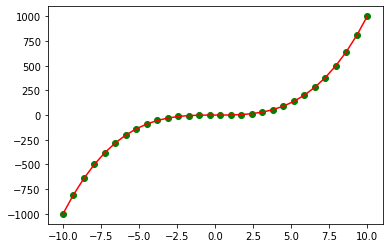

In [23]:
X_new = np.hstack((X , X ** 2, X ** 3, X ** 4)) 
X_new.shape
linreg = LinearRegression()
linreg.fit(X_new, y)
A = linreg.coef_ # тут теперь 4 значения
B = linreg.intercept_ 
print("A = ",A,"B = ", B)
plt.plot(X, y, 'go')
plt.plot(X, B + A[0] * X + A[1] * X ** 2 + A[2] * X ** 3 +  A[3] * X ** 4, "r")

4-я степень такая-же (см фичи)

добавим шум в наши данные и вернемся к 2-й степени

A =  [[4.34648666e-16 1.00000000e+00]] B =  [924.14203163]


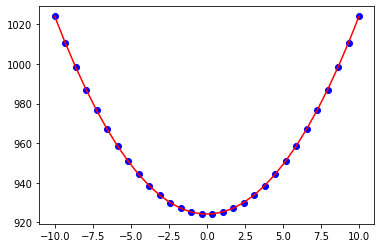

In [25]:
X = np.linspace(-10, 10, 30).reshape(-1,1)
y = X ** 2 + np.random.normal(scale = 500.0)
plt.plot(X, y, 'bo')

X_new = np.hstack((X , X ** 2)) 
X_new.shape
linreg = LinearRegression()
linreg.fit(X_new, y)

A = linreg.coef_ # тут теперь 2 значения
B = linreg.intercept_ 
print("A = ",A,"B = ", B)

plt.plot(X, B + A[0][0] * X + A[0][1] * X ** 2, "r")

Какая красивая прарбола, хорошая апроксимация 

Смышленные заметыли, что мы дали шумовую константу по всем значениям - а это тупо ствиг и от отразился в В

Теперь сделаем норм искажение

A =  [[0.09639553 1.02457398]] B =  [-0.97493279]


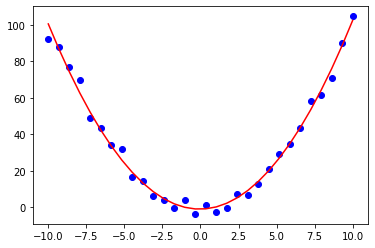

In [26]:
X = np.linspace(-10, 10, 30).reshape(-1,1)
y = X ** 2 + np.random.normal(scale = 3.0, size = (30, 1))
plt.plot(X, y, 'bo')

X_new = np.hstack((X , X ** 2)) 
X_new.shape
linreg = LinearRegression()
linreg.fit(X_new, y)

A = linreg.coef_ # тут теперь 2 значения
B = linreg.intercept_ 
print("A = ",A,"B = ", B)

plt.plot(X, B + A[0][0] * X + A[0][1] * X ** 2, "r")

Видно, что апроксимация хорошая и что линейный член уже не равен нулю - это важно

**Немного о Машинном обучении**
1.   делаем датасет - данные , анализ, нормализация
2.   Деление датасета на тренировачный и тестовый
1.   Grid search, cross - validation
1.   Модель (Линейная Регрессия)
2.   Смотрим график Loss Function
6.   Тюнинг гиперпараметров
6.   Оцениваем данные на тестовых моделях
7.   MSE, MAE - насколько у нас отклоняются предикшины на тестовой выборке от произвольной. Проблемы, когда Accuracy(оптимизация метрик), Precision, Recall - о них потом 







*Как считали Accuracy*

X = [x1, x2, x3, x4, x5, x6, x7, ...]

y = [0, 1, 1, 0, 1, 0, 1, 1]

x1, x2, .... - это столбцы

мы брали предсказание по х и сравнивали с нашими y, которые были в тренировачной выборке(брали сумму по всем значениям и делили на всю длину (y)):

(model(X) == y).sum / len(y)

*Grid search*

Разные Гипер-параметры дают разный результат при одних и тех же входных данных, этот метод позволяет поглядеть на это дело

**гиперпараметры не зависят от входных данных!!!!!**

Рассмотрим пример трейн тест сплина

A =  [[0.10295413 1.04026219]] B =  [-1.53774085]


0.9662160103590742

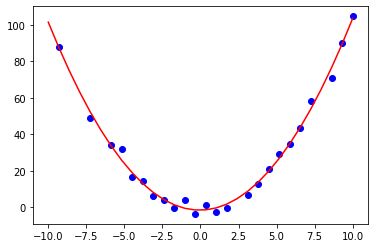

In [27]:
from sklearn.model_selection import train_test_split

X_new = np.hstack((X , X ** 2))
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
plt.plot(X_train[:,0], y_train, 'bo')

linreg = LinearRegression()
linreg.fit(X_train, y_train)
A = linreg.coef_ # тут теперь 2 значения
B = linreg.intercept_ 
print("A = ",A,"B = ", B)

plt.plot(X, B + A[0][0] * X + A[0][1] * X ** 2, "r")

linreg.score(X_test,y_test)

linreg.score - коэфициент корреляции

**Второе занятие**

Повторим немного из первого

In [34]:
import numpy as np
import numpy.linalg 
import sklearn
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

для удобства продублировал импорт библиотек, чтоб второе задание смотреть не отвлекаясь на первое

In [30]:
X = np.linspace(-10, 10, 20)
y = X ** 3 + 3 * X - 5

In [31]:
linreg = LinearRegression()
linreg.fit(np.vstack((X, X ** 3)).T, y)

LinearRegression()

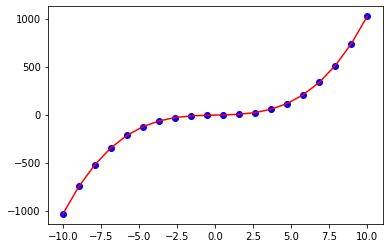

In [32]:
plt.plot(X, y, 'bo')
plt.plot(X, linreg.coef_[0] * X + linreg.coef_[1] * X ** 3 + linreg.intercept_, 'r-')

$$ y = bias + w_1 * x_1 + w_2 * x_2 = bias + w_1 * x_1 + w_2 * {x_1}^2$$

In [40]:
linreg.coef_[0],linreg.coef_[1],linreg.intercept_

(2.999999999999992, 0.9999999999999996, -4.999999999999999)

Пример с **houses dataset**

Скачиваем таблички экселя с данными

In [41]:
!wget -O houses_train.csv https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/train.csv
!wget -O houses_test.csv https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/test.csv

--2023-03-04 08:38:42--  https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘houses_train.csv’

houses_train.csv    100%[===================>] 449.88K  --.-KB/s    in 0.04s   

2023-03-04 08:38:42 (12.1 MB/s) - ‘houses_train.csv’ saved [460676/460676]

--2023-03-04 08:38:43--  https://raw.githubusercontent.com/tiwari91/Housing-Prices/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451405 (441K) [text/plain]

In [44]:
import pandas as pd

In [46]:
df_train = pd.read_csv('houses_train.csv').set_index('Id')
df_test = pd.read_csv('houses_test.csv').set_index('Id')

In [51]:
len(df_train)

1460

в тренировачной у нас 1460 объестов

In [52]:
len(df_test)

1459

в тестовой 1459

Рассмотрим корреляцию в трейне

для примеря взяли SalePrice, и возьмем из него список фичей

In [56]:
df = pd.read_csv('houses_train.csv').set_index('Id')
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [57]:
columns = ['1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'SalePrice']

посмотрим на нашу выборку

In [59]:
df[columns]

,1stFlrSF,TotalBsmtSF,GarageArea,GrLivArea,SalePrice
Id,,,,,
1,856,856,548,1710,208500
2,1262,1262,460,1262,181500
3,920,920,608,1786,223500
4,961,756,642,1717,140000
5,1145,1145,836,2198,250000
...,...,...,...,...,...
1456,953,953,460,1647,175000
1457,2073,1542,500,2073,210000
1458,1188,1152,252,2340,266500


In [63]:
df = pd.read_csv('houses_train.csv').set_index('Id')[columns] # получили такую же таблицу, что и сверху

'SalePrice' - это колонка, которую будем предсказыввать, поэтому мы ее удаляем из Х (это входные данные, тут только фичи)

In [65]:
X = df.drop(columns=['SalePrice']).to_numpy()
print(X.shape) # поглядим какая размерность матрицы
y = df['SalePrice'].to_numpy()

(1460, 4)


Дальше вспоминаем про train test

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_size=0.2 - означает, что 20% для теста, а остальные 80% для train

Дальше юзаем нашу линейную регрессию, что она обучилась

In [69]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

Получили следующие веса:

In [70]:
linreg.coef_

array([ -8.85744163,  50.7605105 , 105.18039453,  66.65706195])

что мы можем отсюда узнать?

например, чем меньше первая фича, тем меньше стоимость квартиры

Проверим насколько мы ошиблись и посмотрим метод предикт

In [72]:
linreg.predict(X_test)

array([129249.18803692, 296635.91051109, 134445.73506383, 183159.986691  ,
       257788.12049998,  54389.07117659, 192012.81409586, 165155.36843493,
        54389.07117659, 144100.48188055, 143104.45770769, 110662.09161653,
       214314.07808911, 207678.2702691 , 185851.00315774, 120668.09531357,
       182124.2867558 , 129524.89401811, 128254.60266505, 203927.50911715,
       198678.63405539, 195104.98690436, 172103.89006919, 120004.03272289,
       211395.8787204 , 171905.39471422, 173118.20029218, 121864.29960099,
       181151.14332887, 181783.54947928, 147327.46949688, 255737.06434258,
       258324.4032032 , 119111.48495266, 253921.71741354, 149709.76887094,
       189411.17238934, 195651.19475563, 293637.88088182,  69371.01539792,
       154113.04612273, 212638.28242113, 118578.82350743, 353876.72429169,
       153416.78368201, 195602.80488806, 115294.98169261, 130270.74598197,
       299706.63513379, 157336.65763929, 116598.2097244 , 231208.71544919,
       116202.20083151, 3

тут на выходе получили наши y, которые предполагает наша модель

Посмотрим на наши метрики (СКО и МАО)

In [74]:
y_pred = linreg.predict(X_test)

посмотрим квадратичную ошибку, оценивать ее учитывая специфику данных

In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(linreg.predict(X_train), y_train)

2140672607.6538696

Глянем еще на абсолютную ошибку, ну ошибка в среднем почти 30к

In [78]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

28916.51268089065

ну и запомним значения

In [79]:
mse_linreg = mean_squared_error(y_test, y_pred)
mae_linreg = mean_absolute_error(y_test, y_pred)

print("MSE: {}\n MAE: {}".format(mse_linreg, mae_linreg))

MSE: 2125411092.7866356
 MAE: 28916.51268089065


Посчитаем в лоб

In [81]:
y_mean = np.ones_like(y_test) * y_train.mean()

mse_mean = mean_squared_error(y_test, y_mean)
mae_mean = mean_absolute_error(y_test, y_mean)

print("MSE: {}\n MAE: {}".format(mse_mean, mae_mean))

MSE: 7677095207.783831
 MAE: 62575.926451960964


теперь видим, что решение в лоб хуже

Посмотрим на медиану

In [82]:
y_median = np.ones_like(y_test) * np.median(y_train)

mse_median = mean_squared_error(y_test, y_median)
mae_median = mean_absolute_error(y_test, y_median)

print("MSE: {}\n MAE: {}".format(mse_median, mae_median))

MSE: 7861866593.5239725
 MAE: 59568.25


Видим, что линейная регрессия и тут обгоняет в качестве, возможно, что выбрав более характерные признаки, то наша модель могла бы очень хорошо отработать: у нас 70 фичей и 1500 строк и может возникнуть недо-обученность  

глянем на X_train

In [84]:
mean_squared_error(linreg.predict(X_train), y_train)

2140672607.6538696

Сравним с mse_linreg(ищи выше)

MSE: 2125411092.7866356
     
mse: 2140672607.6538696

Видим, что ошибка не сильно отличается, значит либо очень мало переобучились, либо вообще не переобучились (это хорошо)

Конец 